In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

In [4]:
df = pd.read_pickle(r"ex1.gz")

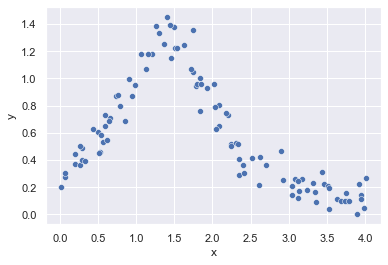

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [5]:
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

In [6]:
x = df["x"]

In [7]:
y = df["y"]

## (a) Pendiente e intercepto 

In [8]:
x_ = []
y_ = []

In [9]:
for i in range(len(x)):
    if(0<=x[i]<=1.5):
        x_.append(x[i])
        y_.append(y[i])

In [10]:
x_new = np.array(x_)
y_new = np.array(y_)

In [11]:
from scipy.optimize import curve_fit

In [12]:
def fun(x,a,b):
    return a*x + b

In [13]:
popt, pcov = curve_fit(fun, x_new, y_new)

In [14]:
data_ = fun(x_new,popt[0],popt[1])

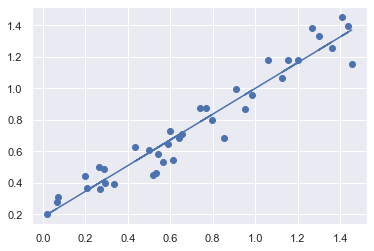

In [15]:
plt.scatter(x_new,y_new)
plt.plot(x_new,data_)

In [16]:
print("El valor de la pendiente es:",popt[0])

El valor de la pendiente es: 0.8163869624029936


In [17]:
print("El valor f(0) es:", popt[1])

El valor f(0) es: 0.18270690829168224


In [18]:
r2 = 1-np.sum((data_-y_new)**2)/np.sum((y_new-y_new.mean())**2)
r2

0.9316416262309236

## (b) Regresión polinomial

In [19]:
matrix = []
for i in range(len(x)):
    matrix.append([1,x[i],x[i]**2,x[i]**3,x[i]**4,x[i]**5])

In [20]:
A = np.matrix(matrix)
A[0]

matrix([[1.00000000e+00, 6.58588054e-02, 4.33738225e-03, 2.85654814e-04,
         1.88128848e-05, 1.23899412e-06]])

In [21]:
matrix_y = np.array([y]).reshape(-1,1)

In [22]:
b = np.matrix(matrix_y)

In [23]:
def L(x,A,b):
    # (b_pred-b_obs)^2
    # m es el numero de datos
    # n es el numero de parametros == 13
    m,n = A.shape
    X = np.matrix(x).T
    DeltaB=(A*X-b) # b gorro - b
    return (DeltaB.T*DeltaB)[0,0]/m # matriz 1x1

In [24]:
res1 = sp.optimize.minimize(fun=L,x0=np.zeros(A.shape[1]), args = (A,b), tol=1e-10)

In [25]:
print("Las constantes B_0,B_1,B_2,B_3,B_4,B_5 en el orden correspondiente son:",res1['x'])

Las constantes B_0,B_1,B_2,B_3,B_4,B_5 en el orden correspondiente son: [ 0.35736017 -0.84261616  3.78480634 -3.00339858  0.85844764 -0.08305844]


In [26]:
puntos = np.linspace(0,4,100)

In [27]:
def fun1_(a,b,c,d,e,f,x):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

In [28]:
y_data1 = fun1_(res1['x'][5],res1['x'][4],res1['x'][3],res1['x'][2],res1['x'][1],res1['x'][0],puntos)

In [29]:
len(y)

100

In [30]:
r2 = 1-np.sum((y_data1-y)**2)/np.sum((y-y.mean())**2)
r2

0.9111079009073296

In [31]:
print("Cuando f(0) el resultado obtendio es:", res1['x'][0])

Cuando f(0) el resultado obtendio es: 0.3573601718054142


Es importante mencionar que al realizar una regresion polinomica vamos a obtener resultados mas precisos. Sabemos analiticamente que el punto de corte con el eje y debe ser aproximademente 0,2. De esta forma, el resultado obtenido es un poco mas preciso con respecto a la regresion lineal pero el modelo polinomico de grado 5 aun sigue siendo algo impreciso

## (c) Regresión polinomial Exacta

In [32]:
x_newbase2 = np.array(x).reshape(-1,1)

In [33]:
y_newbase2 = np.array(y)

In [34]:
P = np.array([np.ones([len(x), 1]),x_newbase2 ,x_newbase2**2, x_newbase2**3, x_newbase2**4, x_newbase2**5]).reshape(6, len(x)).T

In [35]:
v = np.linalg.inv(P.T @ P) @ P.T @ y

In [36]:
def fun1(a,b,c,d,e,f,x):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

In [37]:
y_data = fun1(v[5],v[4],v[3],v[2],v[1],v[0],puntos)

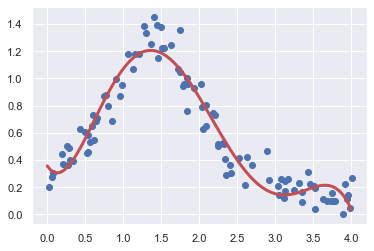

In [38]:
plt.plot(puntos,y_data,color='r',linewidth=3.0)
plt.scatter(x,y)

In [39]:
print("Las constantes B_0,B_1,B_2,B_3,B_4,B_5 en el orden correspondiente son:",v)

Las constantes B_0,B_1,B_2,B_3,B_4,B_5 en el orden correspondiente son: [ 0.35644668 -0.83588268  3.77276401 -2.99526012  0.85614705 -0.08282854]


In [40]:
print("Cuando f(0) el resultado obtendio es:", v[0])

Cuando f(0) el resultado obtendio es: 0.3564466848234892


Comparando los resultados obtenidos con respecto a los a la regresion polonomica del punto b) se puede denotar que la varianza entre datos es bastante pequeña dado que la diferencia esta en la 5 cifra decimal. Así, se puede concluir que la regresion polinomica con respecto a la exacta se encuentran bien. Cabe mencionar que el modelado polinomico no es del todo preciso para ajustar los datos

In [41]:
predicciones = np.array(P @ v).flatten()

In [42]:
observaciones = np.array(y_newbase2).flatten()
bbarrita = observaciones.mean()

In [43]:
r2 = 1-(np.linalg.norm(predicciones - observaciones)**2)/(np.linalg.norm(observaciones - bbarrita)**2)

In [44]:
r2

0.9199225041318273

## (d) Regresión a un modelo teórico

In [45]:
def f(param,x):
    return (param[0])/((x-param[1])**2 + param[2])**param[3]

In [46]:
def Lfit(parametros,x,y): # funcion de costo MSE (No es la mejor!)
    # L = promedio sobre todos los puntos (f(a,b,c;x)-y)^2
    # parametros np.array([a,b,c])
    deltaY=f(parametros,x) - y
    return np.dot(deltaY,deltaY)/len(y)

In [47]:
e=1e-8

In [48]:
res2 = sp.optimize.minimize(fun=Lfit, x0=np.array([0,0,1,0]), args = (x,y), method='L-BFGS-B', tol=e)

In [49]:
print("a, b, c, omega son igual a:", res2['x'])

a, b, c, omega son igual a: [0.68762883 1.39239679 0.49596189 0.93701312]


In [50]:
y1_pred = f(res2.x,x)

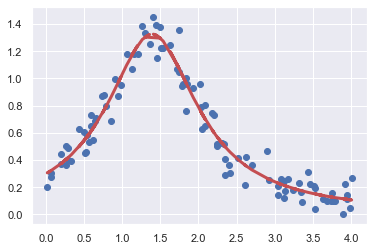

In [51]:
plt.scatter(x,y)
plt.plot(x,y1_pred,color = 'r', linewidth=3.0)

In [52]:
y_cero = f(res2.x,0)

In [53]:
print("f(0) es igual a:", y_cero)

f(0) es igual a: 0.2987063706912142


Comparando los resultados anteriores el modelado teorico se puede concluir que el modelado linear muy impreciso en comparacion a el polinomico. Por otro lado, la diferencia entre el punto de corte del modelo teorico y polinomico no es muy grande, aunque si puede observar que la diferencia entre ambos es significativa